# Symbolic Algebra, Eigenvalues and Eigenvectors

* Introduction to SymPy - Symbolic algebra in Python

* Eigenvalue and Eigenvector Concepts

* NumPy Functions for Eigenvalues and Eigenspace

* Geometric Intuition

## SymPy - Symbolic algebra in Python

To install SymPy using PyPI, run the following command:

`pip install sympy`

To install SymPy using Anaconda, run the following command:

`conda install -c anaconda sympy`

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.

To get started using SymPy in a Python program or notebook, import the module `sympy`:

In [139]:
from sympy import *

To get nice-looking $\LaTeX$ formatted output run:

In [140]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

## Symbolic variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [141]:
x = Symbol('x')

In [142]:
(pi + x)**2

In [143]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [144]:
sqrt(a+b**3)/c

In [145]:
type(a)

sympy.core.symbol.Symbol

We can add assumptions to symbols when we create them:

In [146]:
x = Symbol('x', real=True)

In [147]:
x.is_imaginary

False

In [148]:
x = Symbol('x', positive=True)

In [149]:
x

In [150]:
x > 0

True

### Rational numbers

There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`: 

In [151]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [152]:
r1

In [153]:
r1+r2

In [154]:
r1/r2

## Numerical evaluation

* SymPy uses a library for arbitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

* To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [155]:
pi.evalf(n=50)

In [156]:
y = (x + pi)**2

In [157]:
y

In [158]:
N(y)

In [159]:
9.86960440108936*0.318309886183791**2

In [160]:
N(y, 1)

In [161]:
N(y, 5) # same as evalf

* When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [162]:
y.subs(x, 1.5)

In [163]:
N(y.subs(x, 1.5))

* The `subs` function can of course also be used to substitute Symbols and expressions:

In [164]:
y.subs(x, a+pi)

## Combine numerical evaluation of expressions with NumPy arrays:

In [165]:
import numpy

In [166]:
x_vec = numpy.arange(0, 10, 0.1)

In [167]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

In [168]:
y_vec

array([9.86960440108936, 10.5079229318073, 11.1662414625253,
       11.8445599932432, 12.5428785239612, 13.2611970546792,
       13.9995155853971, 14.7578341161151, 15.5361526468330,
       16.3344711775510, 17.1527897082689, 17.9911082389869,
       18.8494267697049, 19.7277453004228, 20.6260638311408,
       21.5443823618587, 22.4827008925767, 23.4410194232947,
       24.4193379540126, 25.4176564847306, 26.4359750154485,
       27.4742935461665, 28.5326120768845, 29.6109306076024,
       30.7092491383204, 31.8275676690383, 32.9658861997563,
       34.1242047304742, 35.3025232611922, 36.5008417919102,
       37.7191603226281, 38.9574788533461, 40.2157973840640,
       41.4941159147820, 42.7924344455000, 44.1107529762179,
       45.4490715069359, 46.8073900376538, 48.1857085683718,
       49.5840270990898, 51.0023456298077, 52.4406641605257,
       53.8989826912436, 55.3773012219616, 56.8756197526795,
       58.3939382833975, 59.9322568141155, 61.4905753448334,
       63.0688938755514,

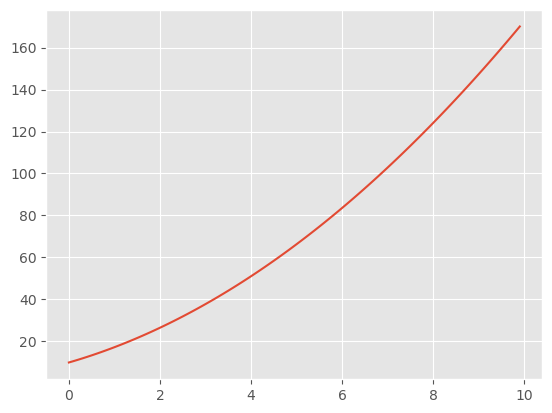

In [169]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);


## Great. Let's make it faster


* Use the function `lambdify` to "compile" a SymPy expression into a Python function that is much more efficient to evaluate numerically
* By default, lambdify on implementations in the math standard library, which could be slow over a large range of values.
* To leverage numpy library as numerical backend, we have to add 'numpy' as an argument for lambdify() function.
* Then it becomes a vectorized function of numpy that works on numpy array.

In [170]:
f = lambdify([x], (x + pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [171]:
f

<function _lambdifygenerated(x)>

In [172]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

* The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [173]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

29.9 ms ± 7.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [174]:
%%timeit

y_vec = f(x_vec)

3.04 µs ± 615 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Algebraic manipulations

* One of the main uses of an CAS is to perform algebraic manipulations of expressions. 
* For example, we might want to expand a product, factor an expression, or simplify an expression. 
* The functions for doing these basic operations in SymPy are demonstrated in this section.

### Expand and factor

The first steps in an algebraic manipulation 

In [175]:
(x+1)*(x+2)*(x+3)

In [176]:
expand((x+1)*(x+2)*(x+3))

* The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

* See `help(expand)` for a detailed explanation of the various types of expansions the `expand` functions can perform.

In [177]:
sin(a+b)

In [178]:
expand(sin(a+b), trig=True)

* The opposite of product expansion is of course factoring. To factor an expression in SymPy use the `factor` function: 

In [179]:
factor(x**3 + 6 * x**2 + 11*x + 6)

In [180]:
factor(x**3 + 6 * x**2 + 11*x + 5)

### Simplify

* The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. 
* More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [181]:
# simplify (sometimes) expands a product
simplify((x+1)*(x+2)*(x+3))

In [182]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

In [183]:
simplify(cos(x)/sin(x))

### apart and together

To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [184]:
f1 = 1/((a+1)*(a+2))

In [185]:
f1

In [186]:
apart(f1)

In [187]:
f2 = 1/(a+2) + 1/(a+3)

In [188]:
f2

In [189]:
together(f2)

Simplify usually combines fractions but does not factor: 

In [190]:
simplify(f2)

### Sums and products

* Evaluate sums using the function `Sum`:

In [191]:
n = Symbol("n")

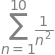

In [192]:
Sum(1/n**2, (n, 1, 10))

In [193]:
Sum(1/n**2, (n,1, 10)).evalf()

In [194]:
Sum(1/n**2, (n, 1, oo)).evalf()

* Products work much the same way:

In [196]:
Product(n**3, (n, 1, 10)).evalf() # 10!

## Linear algebra

### Matrices

* Matrices are defined using the `Matrix` class:

In [59]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

In [60]:
A = Matrix([[m11, m12],[m21, m22]])
A

⎡m₁₁  m₁₂⎤
⎢        ⎥
⎣m₂₁  m₂₂⎦

In [61]:
b = Matrix([[b1], [b2]])
b

⎡b₁⎤
⎢  ⎥
⎣b₂⎦

* With `Matrix` class instances we can do the usual matrix algebra operations:

In [62]:
A**2

⎡    2                               ⎤
⎢ m₁₁  + m₁₂⋅m₂₁    m₁₁⋅m₁₂ + m₁₂⋅m₂₂⎥
⎢                                    ⎥
⎢                                 2  ⎥
⎣m₁₁⋅m₂₁ + m₂₁⋅m₂₂   m₁₂⋅m₂₁ + m₂₂   ⎦

In [63]:
A * b

⎡b₁⋅m₁₁ + b₂⋅m₁₂⎤
⎢               ⎥
⎣b₁⋅m₂₁ + b₂⋅m₂₂⎦

* And calculate determinants and inverses, and the like:

In [64]:
A.det()

In [65]:
A.inv()

⎡       m₂₂               -m₁₂       ⎤
⎢─────────────────  ─────────────────⎥
⎢m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎥
⎢                                    ⎥
⎢      -m₂₁                m₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣m₁₁⋅m₂₂ - m₁₂⋅m₂₁  m₁₁⋅m₂₂ - m₁₂⋅m₂₁⎦

In [198]:
m11, m12, m13, m21, m22, m23, m31, m32, m33= symbols("m11, m12, m13, m21, m22, m23, m31, m32, m33")
Matrix([[m11, m12, m13],[ m21, m22, m23], [m31, m32, m33]]).det()

In [199]:
Matrix([[m11, m12, m13],[ m21, m22, m23], [m31, m32, m33]]).inv()

⎡                                m₂₂⋅m₃₃ - m₂₃⋅m₃₂                            
⎢─────────────────────────────────────────────────────────────────────────────
⎢m₁₁⋅m₂₂⋅m₃₃ - m₁₁⋅m₂₃⋅m₃₂ - m₁₂⋅m₂₁⋅m₃₃ + m₁₂⋅m₂₃⋅m₃₁ + m₁₃⋅m₂₁⋅m₃₂ - m₁₃⋅m₂₂
⎢                                                                             
⎢                                -m₂₁⋅m₃₃ + m₂₃⋅m₃₁                           
⎢─────────────────────────────────────────────────────────────────────────────
⎢m₁₁⋅m₂₂⋅m₃₃ - m₁₁⋅m₂₃⋅m₃₂ - m₁₂⋅m₂₁⋅m₃₃ + m₁₂⋅m₂₃⋅m₃₁ + m₁₃⋅m₂₁⋅m₃₂ - m₁₃⋅m₂₂
⎢                                                                             
⎢                                m₂₁⋅m₃₂ - m₂₂⋅m₃₁                            
⎢─────────────────────────────────────────────────────────────────────────────
⎣m₁₁⋅m₂₂⋅m₃₃ - m₁₁⋅m₂₃⋅m₃₂ - m₁₂⋅m₂₁⋅m₃₃ + m₁₂⋅m₂₃⋅m₃₁ + m₁₃⋅m₂₁⋅m₃₂ - m₁₃⋅m₂₂

                                      -m₁₂⋅m₃₃ + m₁₃⋅m₃₂                      
────  ─────────────────────────────────────────────

* identity matrix

In [200]:
eye(5)

⎡1  0  0  0  0⎤
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎢0  0  1  0  0⎥
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎣0  0  0  0  1⎦

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [67]:
x = Symbol('x', real=True)

In [68]:
solve(x**2 - 1, x)

In [69]:
x = Symbol('x', positive=True)

In [70]:
solve(x**2 - 1, x)

In [204]:
x=Symbol('x')
solve(sin(x)+cos(x)**2-1, x)

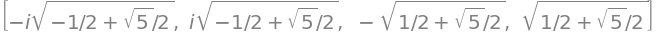

In [72]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [205]:
x, y = symbols("x, y")

In [207]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

In [75]:
solve([x + y - a, x - y - c], [x,y])

* With the help of sympy.Matrix().rref() method, we can put a matrix into reduced Row echelon form. Matrix().rref() returns a tuple of two elements. 
* The first is the reduced row echelon form, and the second is a tuple of indices of the pivot columns.

In [76]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

⎡1   0   1   3 ⎤
⎢              ⎥
⎢2   3   4   7 ⎥
⎢              ⎥
⎣-1  -3  -3  -4⎦

In [77]:
M_rref = M.rref()  
M_rref

⎛⎡1  0   1    3 ⎤        ⎞
⎜⎢              ⎥        ⎟
⎜⎢0  1  2/3  1/3⎥, (0, 1)⎟
⎜⎢              ⎥        ⎟
⎝⎣0  0   0    0 ⎦        ⎠

In [78]:
M = Matrix([[14, 0, 11, 3], [22, 23, 4, 7], [-12, -34, -3, -4]])
M.rref()  

⎛⎡         1405 ⎤           ⎞
⎜⎢1  0  0  ──── ⎥           ⎟
⎜⎢         4254 ⎥           ⎟
⎜⎢              ⎥           ⎟
⎜⎢           10 ⎥           ⎟
⎜⎢0  1  0   ─── ⎥, (0, 1, 2)⎟
⎜⎢          709 ⎥           ⎟
⎜⎢              ⎥           ⎟
⎜⎢         -314 ⎥           ⎟
⎜⎢0  0  1  ─────⎥           ⎟
⎝⎣          2127⎦           ⎠

# Eigenvalue and Eigenvector

* An  <font face="gotham" color="red">eigenvector</font> of an $n \times n$ matrix $A$ is a nonzero vector $x$ such that $Ax = \lambda x$ for some scalar $\lambda$. 
* A scalar $\lambda$ is called an  <font face="gotham" color="red">eigenvalue</font> of $A$ if there is a nontrivial solution $x$ of $Ax = \lambda x$, such an $x$ is called an eigenvector corresponding to $\lambda$. 

Consider the matrix

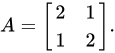


* The figure below shows the effect of this transformation on point coordinates in the plane. 



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Eigenvectors-extended.gif/450px-Eigenvectors-extended.gif" width="550" align="center">

### Let's see the eigenvalues and eigenvectors. We will come back to the code a little bit later.

In [79]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [80]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [81]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[2,1],[1,2]])
I = sy.eye(2)

In [82]:
A - lamda*I

⎡2 - λ    1  ⎤
⎢            ⎥
⎣  1    2 - λ⎦

In [83]:
p = A.charpoly(lamda);p

In [84]:
sy.factor(p.as_expr())

In [85]:
sy.matrices.matrices.MatrixEigen.eigenvects(A)

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜1, 1, ⎢⎢  ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

### What do these numbers mean?

* The purple and blue eigenvectors are eigenvectors because they don't change the directions after transformation.

* The lengths of the purple vectors are unchanged after the transformation (due to their eigenvalue of 1), while blue vectors are three times the length of the original (due to their eigenvalue of 3)

### The linear algebra

Rewrite the equation,

$$\large 
(A-\lambda I)x = 0
$$

Since the eigenvector should be a nonzero vector, which means: 

1. The column or rows of $(A-\lambda I)$ are linearly dependent
2. $(A-\lambda I)$ is not full rank, $Rank(A)<n$.
3. $(A-\lambda I)$ is not invertible.
4. $\text{det}(A-\lambda I)=0$, which is called <font face="gotham" color="red">characteristic equation</font>.

It is called Cramer's rule, https://en.wikipedia.org/wiki/Cramer%27s_rule

Consider a matrix $A$

$$\large 
A=\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]
$$

Set up the characteristic equation,

$$\large 
\text{det}\left(
\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]-
\lambda
\left[\matrix{1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1}\right]
\right)=0
$$

* Use SymPy ```charpoly``` and ```factor```, we can have straightforward solutions for eigenvalues.

### ATTENTION: <font color=red> 'lamda' withtout 'b' is used here for SymPy because lambda is reserved for Python</font>

In [86]:
lamda = sy.symbols('lamda') 

* ```charpoly``` returns characteristic equation.

In [87]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda); p

Factor the polynomial such that we can see the solution.

In [88]:
p

In [89]:
sy.factor(lamda**3 - 4 * lamda**2 + 5*lamda-2)

* Previously factor did work with Poly but that was changed in new version of SymPy

In [90]:
factor(p)

* The factor function is for Expr rather than Poly so you can use as_expr to factor as Expr or factor_list to factor as Poly:

In [91]:
factor(p.as_expr())

* The number of linearly independent eigenvectors corresponding to a single eigenvalue is its geometric multiplicity
* From the factored characteristic polynomial, we get the eigenvalue, and $\lambda =1$ has algebraic multiplicity of $2$, because there are two $(\lambda-1)$. If not factored, we can use ```solve``` instead.

In [92]:
sy.solve(p,lamda)

* Or use ```eigenvals``` directly.

In [93]:
# import sympy.matrices.matrices
sy.matrices.matrices.MatrixEigen.eigenvals(A)

* To find the eigenvector corresponding to $\lambda$, we substitute the eigenvalues back into $(A-\lambda I)x=0$ and solve it. Construct augmented matrix with $\lambda =1$ and perform rref.

In [94]:
A

⎡1  0   0⎤
⎢        ⎥
⎢1  0   1⎥
⎢        ⎥
⎣2  -2  3⎦

In [95]:
sy.eye(3)

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [96]:
A - 1*sy.eye(3)

⎡0  0   0⎤
⎢        ⎥
⎢1  -1  1⎥
⎢        ⎥
⎣2  -2  2⎦

In [97]:
sy.zeros(3,1)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [98]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1))

⎡0  0   0  0⎤
⎢           ⎥
⎢1  -1  1  0⎥
⎢           ⎥
⎣2  -2  2  0⎦

In [99]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  -1  1  0⎤      ⎞
⎜⎢           ⎥      ⎟
⎜⎢0  0   0  0⎥, (0,)⎟
⎜⎢           ⎥      ⎟
⎝⎣0  0   0  0⎦      ⎠

* The null space of any matrix A consists of all the vectors B such that AB = 0 and B is not zero.
* The null space is the solution set of the linear system.
* From the first row we can get $x_1-x_2+x_3=0$, so $x_1=x_2-x_3$

$$\large 
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

This is called <font face="gotham" color="red"> eigenspace </font> for $\lambda = 1$, which is a subspace in $\mathbb{R}^3$. All eigenvectors are inside the eigenspace.

We can proceed with $\lambda = 2$ as well.

In [100]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  0   0    0⎤        ⎞
⎜⎢             ⎥        ⎟
⎜⎢0  1  -1/2  0⎥, (0, 1)⎟
⎜⎢             ⎥        ⎟
⎝⎣0  0   0    0⎦        ⎠

The null space is the solution set of the linear system.

$$\large 
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

To avoid troubles of solving back and forth, SymPy has ```eigenvects``` to calcuate eigenvalues and eigenspaces (basis of eigenspace).

In [101]:
eig = sy.matrices.matrices.MatrixEigen.eigenvects(A)
eig

⎡⎛      ⎡⎡1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡ 0 ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎢⎜1, 2, ⎢⎢1⎥, ⎢0 ⎥⎥⎟, ⎜2, 1, ⎢⎢1/2⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

To clarify what we just get, write

In [102]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

Eigenvalue = 1, Multiplicity = 2, Eigenspace = [Matrix([
[1],
[1],
[0]]), Matrix([
[-1],
[ 0],
[ 1]])]


In [103]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

Eigenvalue = 2, Multiplicity = 1, Eigenspace = [Matrix([
[  0],
[1/2],
[  1]])]


## NumPy Functions for Eigenvalues and Eigenspace

Convert SymPy matrix into NumPy float array.

In [104]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

```.eigvals()``` and ```.eig(A)``` are handy functions for eigenvalues and **normalized** eigenvectors.

In [105]:
np.linalg.eigvals(A) 

array([2., 1., 1.])

In [106]:
np.linalg.eig(A) #return both eigenvalues and eigenvectors

(array([2., 1., 1.]),
 array([[ 0.   ,  0.   ,  0.408],
        [ 0.447,  0.707, -0.408],
        [ 0.894,  0.707, -0.816]]))

* Before normalization, it should be like

In [107]:
Matrix([[0,1,2], [0,1,1],[1,-1,-2]]).T

⎡0  0  1 ⎤
⎢        ⎥
⎢1  1  -1⎥
⎢        ⎥
⎣2  1  -2⎦

* This is actually equivalent to Sympy result

In [108]:
eig

⎡⎛      ⎡⎡1⎤  ⎡-1⎤⎤⎞  ⎛      ⎡⎡ 0 ⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎢⎜1, 2, ⎢⎢1⎥, ⎢0 ⎥⎥⎟, ⎜2, 1, ⎢⎢1/2⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥  ⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 1 ⎦⎦⎠⎦

* Let's see how they are equivalent

In [109]:
Matrix([[1,1,0],[-1,0,1]]).T, Matrix([[0,1,1],[-1,0,1]]).T, Matrix([[0,1,1],[1,0,-1]]).T, Matrix([[0,1,1],[1,-1,-2]]).T

⎛⎡1  -1⎤  ⎡0  -1⎤  ⎡0  1 ⎤  ⎡0  1 ⎤⎞
⎜⎢     ⎥  ⎢     ⎥  ⎢     ⎥  ⎢     ⎥⎟
⎜⎢1  0 ⎥, ⎢1  0 ⎥, ⎢1  0 ⎥, ⎢1  -1⎥⎟
⎜⎢     ⎥  ⎢     ⎥  ⎢     ⎥  ⎢     ⎥⎟
⎝⎣0  1 ⎦  ⎣1  1 ⎦  ⎣1  -1⎦  ⎣1  -2⎦⎠

## An Example

Consider a matrix $A$

In [110]:
A = sy.Matrix([[-4, -4, 20, -8, -1], 
               [14, 12, 46, 18, 2], 
               [6, 4, -18, 8, 1], 
               [11, 7, -37, 17, 2], 
               [18, 12, -60, 24, 5]])
A

⎡-4  -4  20   -8  -1⎤
⎢                   ⎥
⎢14  12  46   18  2 ⎥
⎢                   ⎥
⎢6   4   -18  8   1 ⎥
⎢                   ⎥
⎢11  7   -37  17  2 ⎥
⎢                   ⎥
⎣18  12  -60  24  5 ⎦

Find eigenvalues.

In [111]:
eig = sy.matrices.matrices.MatrixEigen.eigenvals(A)
eig

Or use NumPy functions, show the eigenvalues.

In [112]:
A = np.array(A)
A = A.astype(float)
eigval, eigvec = np.linalg.eig(A)
eigval

array([ 21.69, -16.69,   3.  ,   2.  ,   2.  ])

And corresponding eigenvectors.

In [113]:
eigvec

array([[-0.124, -0.224, -0.   , -0.199,  0.267],
       [ 0.886, -0.543, -0.894, -0.129, -0.356],
       [ 0.124,  0.224,  0.   ,  0.   , -0.   ],
       [ 0.216,  0.392,  0.447,  0.328,  0.089],
       [ 0.371,  0.672, -0.   , -0.914, -0.891]])

## <font face="gotham" color="purple"> A Visualization Example

Let 

$$
A= 
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
$$

find the eigenvalues and vectors, then visualize in $\mathbb{R}^2$

Use characteristic equation $|A - \lambda I|=0$

$$
\left|
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
-
\left[
\begin{matrix}
\lambda & 0\\ 
0 & \lambda
\end{matrix}
\right]\right|=0
$$

In [114]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[1,6],[5,2]])
I = sy.eye(2)

In [115]:
A - lamda*I

⎡1 - λ    6  ⎤
⎢            ⎥
⎣  5    2 - λ⎦

In [116]:
p = A.charpoly(lamda);p

In [117]:
sy.factor(p.as_expr())

There are two eigenvalues: $7$ and $4$. Next we calculate eigenvectors.

In [118]:
(A - 7*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  -1  0⎤      ⎞
⎜⎢        ⎥, (0,)⎟
⎝⎣0  0   0⎦      ⎠

The eigenspace for $\lambda = 7$ is 

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1\\
1
\end{matrix}
\right]
$$

Any vector is eigenspace as long as $x \neq 0$ is an eigenvector. Let's find out eigenspace for $\lambda = 4$.

In [119]:
(A + 4*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  6/5  0⎤      ⎞
⎜⎢         ⎥, (0,)⎟
⎝⎣0   0   0⎦      ⎠

The eigenspace for $\lambda = -4$ is 

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
-\frac{6}{5}\\
1
\end{matrix}
\right]
$$

Let's plot both eigenvectors as $(1, 1)$ and $(-6/5, 1)$ and multiples with eigenvalues.

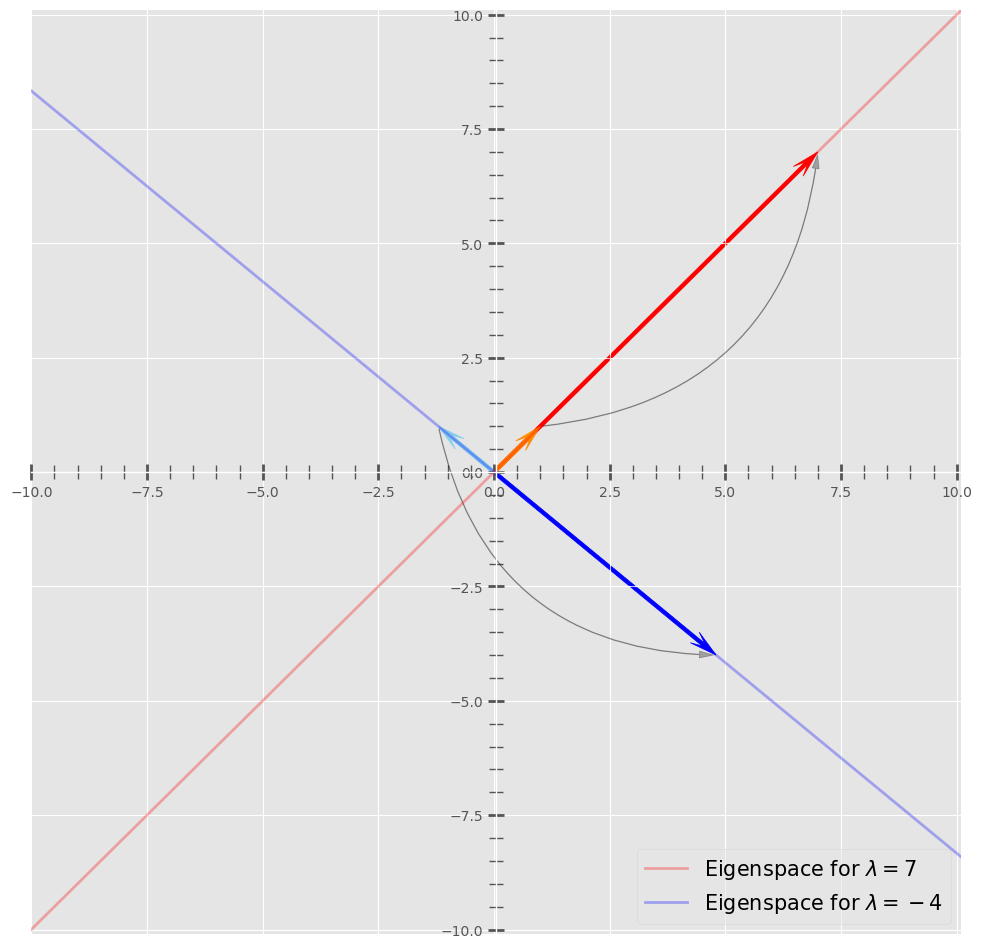

In [120]:
fig, ax = plt.subplots(figsize = (12, 12))
arrows = np.array([ [[0,0,1,1]],
                  [[0,0,-6/5,1]],
                  [[0,0,7,7]],
                  [[0,0,24/5,-4]] ])
colors = ['darkorange','skyblue','r','b']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

################################### Eigenspace #################################
x = np.arange(-10, 10.6, .5)
y = x
ax.plot(x, y, lw = 2, color = 'red', alpha = .3, label = 'Eigenspace for $\lambda = 7$')

x = np.arange(-10, 10.6, .5)
y = -5/6*x
ax.plot(x, y, lw = 2, color = 'blue', alpha = .3,  label = 'Eigenspace for $\lambda = -4$')

######################## Annotation Arrows ################################

style="Simple, tail_width=0.5, head_width=5, head_length=10"
kw = dict(arrowstyle=style, color="k")

a = mpl.patches.FancyArrowPatch((1,1), (7,7),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

a = mpl.patches.FancyArrowPatch((-6/5,1), (24/5,-4),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

############################ Legend ###############################

leg = ax.legend(fontsize = 15, loc = 'lower right')
leg.get_frame().set_alpha(0.5)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')
plt.show()

# <font face="gotham" color="purple"> Geometric Intuition

Eigenvector has a special property that **preserves the pointing direction after linear transformation**.To illustrate the idea, let's plot a 'circle' and arrows touching edges of circle.

Start from one arrow. If you want to draw a smoother circle, you can use parametric function rather two quadratic functions, because cicle can't be draw with one-to-one mapping.But this is not the main issue, we will live with that.

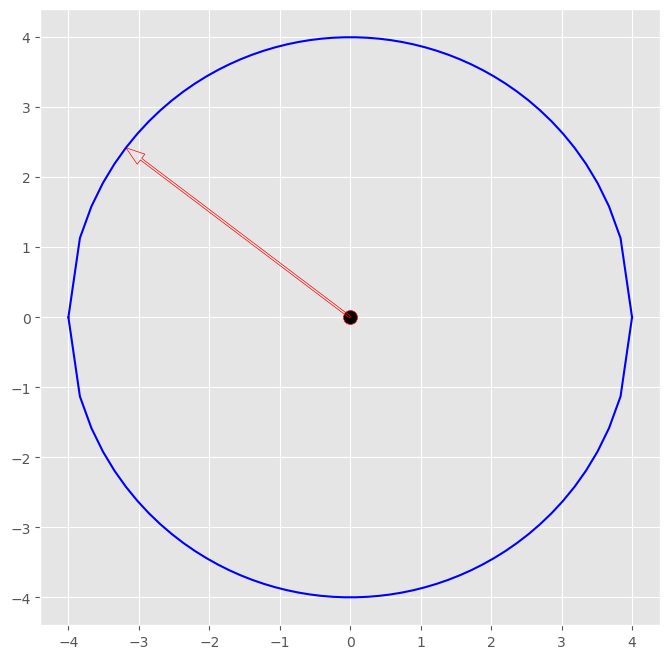

In [121]:
x = np.linspace(-4, 4)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

ax.arrow(0, 0, x[5], y_u[5], head_width = .18, 
         head_length= .27, length_includes_head = True, 
         width = .03, ec = 'r', fc = 'None')
plt.show()

Now, the same 'circle', but more arrows.

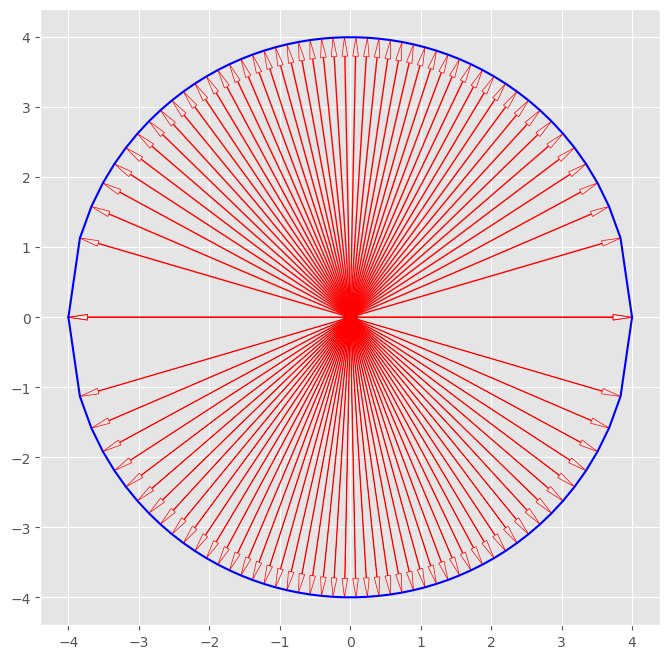

In [122]:
x = np.linspace(-4, 4, 50)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .08, 
             head_length= .27, length_includes_head = True,
             width = .01, ec = 'r', fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .08, 
             head_length= .27, length_includes_head = True, 
             width = .008, ec = 'r', fc = 'None')

Now we will perform linear transformation on the circle. Technically, we can only transform the points - the arrow tip - that we specify on the circle.

We create a matrix

$$
A = 
\left[\begin{matrix}
3 & -2\\
1 & 0
\end{matrix}\right]
$$

Align all the coordinates into two matrices for upper and lower half respectively. 

$$
V_u = 
\left[\begin{matrix}
x_1^u & x_2^u & \ldots & x_m^u\\
y_1^u & y_2^u & \ldots & y_m^u
\end{matrix}\right]\\
V_d = 
\left[\begin{matrix}
x_1^d & x_2^d & \ldots & x_m^d\\
y_1^d & y_2^d & \ldots & y_m^d
\end{matrix}\right]
$$

The matrix multiplication $AV_u$ and $AV_d$ are linear transformation of the circle.

In [123]:
A = np.array([[3, -2], [1, 0]])

Vu = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
AV_u = (A@Vu.T)

Vd = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
AV_d = (A@Vd.T)

The circle becomes an ellipse. However, if you watch closely, you will find there are some arrows still pointing the same direction after linear transformation.

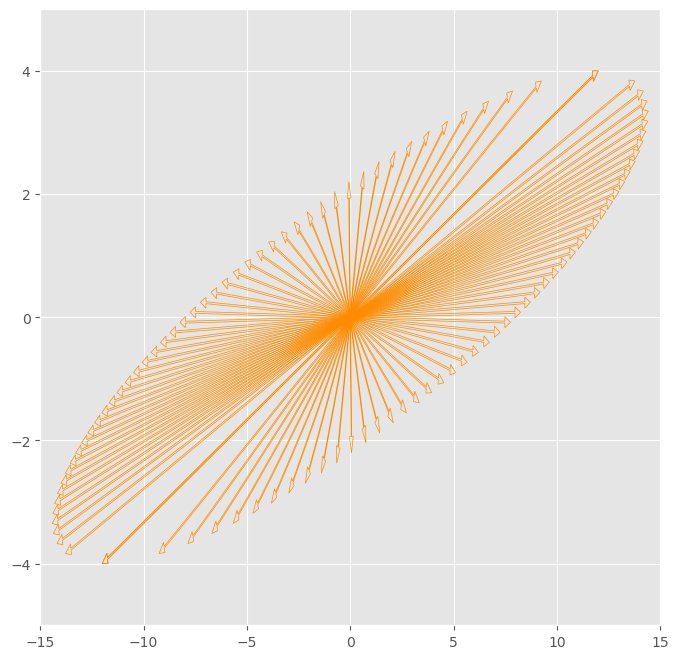

In [124]:
fig, ax = plt.subplots(figsize = (8, 8))

for i in range(len(x)):
    ax.arrow(0, 0, AV_u[0, i], AV_u[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, AV_d[0, i], AV_d[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
ax.axis([-15, 15, -5, 5])
plt.show()

We can plot the cirle and ellipse together, those vectors pointing the same direction before and after the linear transformation are eigenvector of $A$, eigenvalue is the length ratio between them.

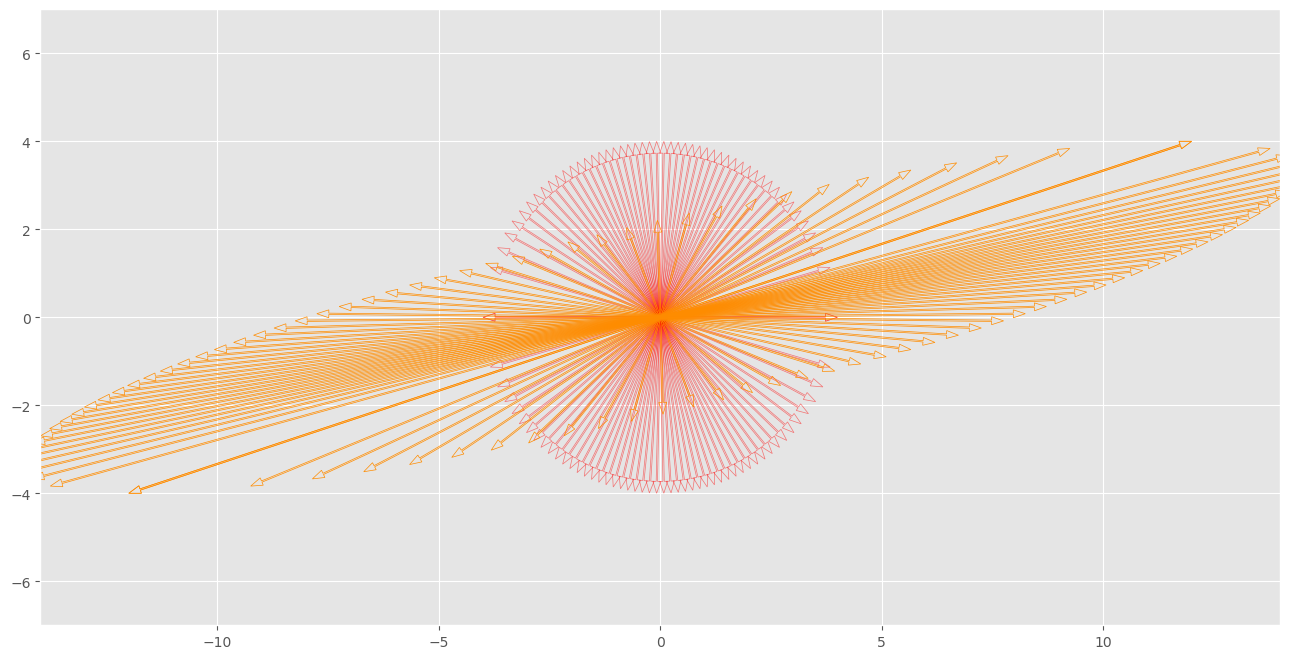

In [125]:
k = 50
x = np.linspace(-4, 4, k)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (16, 8))

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')

A = np.array([[3, -2], [1, 0]])

v = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
Av_1 = (A@v.T)

v = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
Av_2 = (A@v.T)

for i in range(len(x)):
    ax.arrow(0, 0, Av_1[0, i], Av_1[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, Av_2[0, i], Av_2[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
n = 7
ax.axis([-2*n, 2*n, -n, n])
plt.show()

In [126]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[3,-2],[1,0]])
I = sy.eye(2)

In [127]:
A - lamda*I

⎡3 - λ  -2⎤
⎢         ⎥
⎣  1    -λ⎦

In [128]:
p = A.charpoly(lamda);p

In [129]:
sy.factor(p)

In [130]:
sy.factor(p.as_expr())

In [131]:
sy.matrices.matrices.MatrixEigen.eigenvects(A)

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡2⎤⎤⎞⎤
⎢⎜1, 1, ⎢⎢ ⎥⎥⎟, ⎜2, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

Another example,

Yellow vector gets knocked off its original direction during warping

<img src="https://miro.medium.com/v2/resize:fit:1200/1*6llevBZ2OC3FSZTkAxnKlA.gif" width="550" align="center">

However, in the below figure, yellow and green vectors expand during warping, without changing direction

<img src="https://i.makeagif.com/media/6-21-2018/mykMiT.gif" width="550" align="center">

In [132]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[3,1],[0,2]])
I = sy.eye(2)

In [133]:
A - lamda*I

⎡3 - λ    1  ⎤
⎢            ⎥
⎣  0    2 - λ⎦

In [134]:
p = A.charpoly(lamda);p

In [135]:
sy.factor(p.as_expr())

In [136]:
sy.matrices.matrices.MatrixEigen.eigenvects(A)

⎡⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜2, 1, ⎢⎢  ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠⎦

### Homework of today

* Compute the eigenvalues and eigenvectors of matrix [[2,0],[0,2]]
* Plot the circle and arrows as the example above.
* What did you find?